<a href="https://colab.research.google.com/github/AnanthaTeja/Super_store_Data-Analysis/blob/main/Super_Store_managment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Loading the dataset

In [ ]:
d_frm=pd.read_csv('SampleSuperstore.csv')

##Info of data_frame

In [ ]:
print("Info of the data set: ")
d_frm.info()

Info of the data set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9416 non-null   object 
 1   Segment       9416 non-null   object 
 2   Country       9416 non-null   object 
 3   City          9416 non-null   object 
 4   State         9416 non-null   object 
 5   Postal Code   9415 non-null   float64
 6   Region        9415 non-null   object 
 7   Category      9415 non-null   object 
 8   Sub-Category  9415 non-null   object 
 9   Sales         9415 non-null   float64
 10  Quantity      9415 non-null   float64
 11  Discount      9415 non-null   float64
 12  Profit        9415 non-null   float64
dtypes: float64(5), object(8)
memory usage: 956.4+ KB


In [ ]:
print("Preview of the data: ")
d_frm.head()

Preview of the data: 


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164


In [ ]:
print("Dimensions of the data set: ")
print(d_frm.shape)
print(d_frm.ndim)

Dimensions of the data set: 
(9416, 13)
2


In [ ]:
print("All column elements: ")
print(d_frm.columns)


All column elements: 
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


### Checking if there are null or NA elements in the data set


In [ ]:
print("Checking number of null elements in each column: ")
print(d_frm.isnull().sum())

Checking number of null elements in each column: 
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     1
Region          1
Category        1
Sub-Category    1
Sales           1
Quantity        1
Discount        1
Profit          1
dtype: int64


In [ ]:
d_frm.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9415.000000,9415.000000,9415.000000,9415.000000,9415.000000
mean,55164.217950,230.673306,3.787679,0.156527,29.141801
std,32050.408371,630.543607,2.216279,0.206791,235.859398
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23101.500000,17.340000,2.000000,0.000000,1.724800
50%,57103.000000,54.528000,3.000000,0.200000,8.643600
75%,90004.000000,210.200000,5.000000,0.200000,29.341200
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Summary of the data type object
d_frm.describe(include='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9416,9416,9416,9416,9416,9415,9415,9415
unique,4,3,1,524,50,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5619,4888,9416,852,1864,3017,5673,1436


In [ ]:
print("Displaying all unique elements: ")
print(d_frm['Category'].unique())
print(d_frm['Country'].unique())
print(d_frm['Ship Mode'].unique())
print(d_frm['Segment'].unique())
print(d_frm['Sub-Category'].unique())
print(d_frm['Region'].unique())

Displaying all unique elements: 
['Furniture' 'Office Supplies' 'Technology' nan]
['United States']
['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers' nan]
['South' 'West' 'Central' 'East' nan]


## Working with the data set


In [ ]:
d_frm['Category'].value_counts().sum()
Cat_per = d_frm['Category'].value_counts().to_frame().sort_index()
Cat_per['percentage %'] = (Cat_per['Category'] / d_frm['Category'].value_counts().sum())*100
Cat_per

,Category,percentage %
Furniture,2000,21.242698
Office Supplies,5673,60.254912
Technology,1742,18.502390


In [ ]:
d_frm['Ship Mode'].value_counts().sum()
ships_per = d_frm['Ship Mode'].value_counts().to_frame().sort_index()
ships_per['percentage %'] = (ships_per['Ship Mode'] / d_frm['Ship Mode'].value_counts().sum())*100
ships_per

,Ship Mode,percentage %
First Class,1451,15.409941
Same Day,515,5.469414
Second Class,1831,19.445624
Standard Class,5619,59.675021


In [ ]:
d_frm['Segment'].value_counts()

Consumer       4888
Corporate      2849
Home Office    1679
Name: Segment, dtype: int64

In [ ]:
d_frm['Segment'].value_counts().sum()
segmen_per = d_frm['Segment'].value_counts().to_frame().sort_index()
segmen_per['percentage %'] = (segmen_per['Segment'] /d_frm['Segment'].value_counts().sum())*100
segmen_per

,Segment,percentage %
Consumer,4888,51.911640
Corporate,2849,30.257009
Home Office,1679,17.831351


#### Removing the unwanted info or column


In [ ]:
d_frm.drop(columns='Postal Code',inplace=True)
d_frm.drop_duplicates()
d_frm.head(1)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2.0,0.0,41.9136


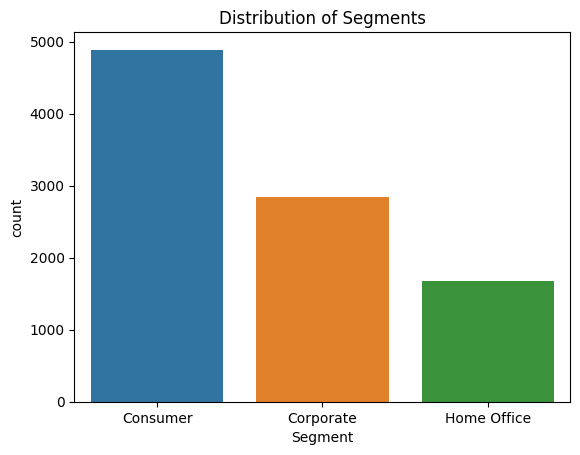

In [ ]:
data=pd.read_csv("SampleSuperstore.csv")
data = pd.read_csv("SampleSuperstore.csv")
sns.countplot(data=data, x='Segment')
plt.title('Distribution of Segments')
plt.show()

In the Home Office Segment, we observe that the count is less. So convergent strategy and improvement is a necessity for this Segment.

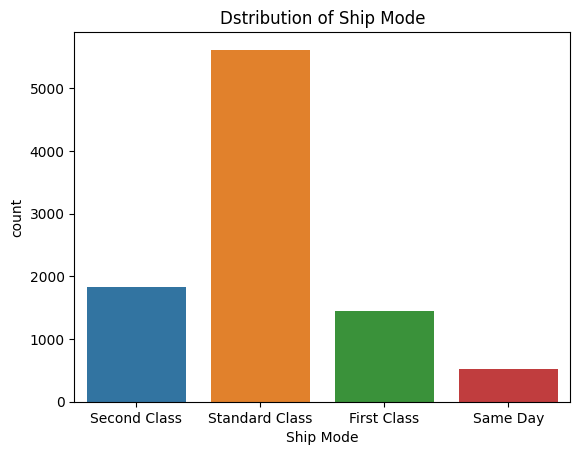

In [ ]:
sns.countplot(data=data,x='Ship Mode')
plt.title('Dstribution of Ship Mode')
plt.show()


#### Distribution based on States

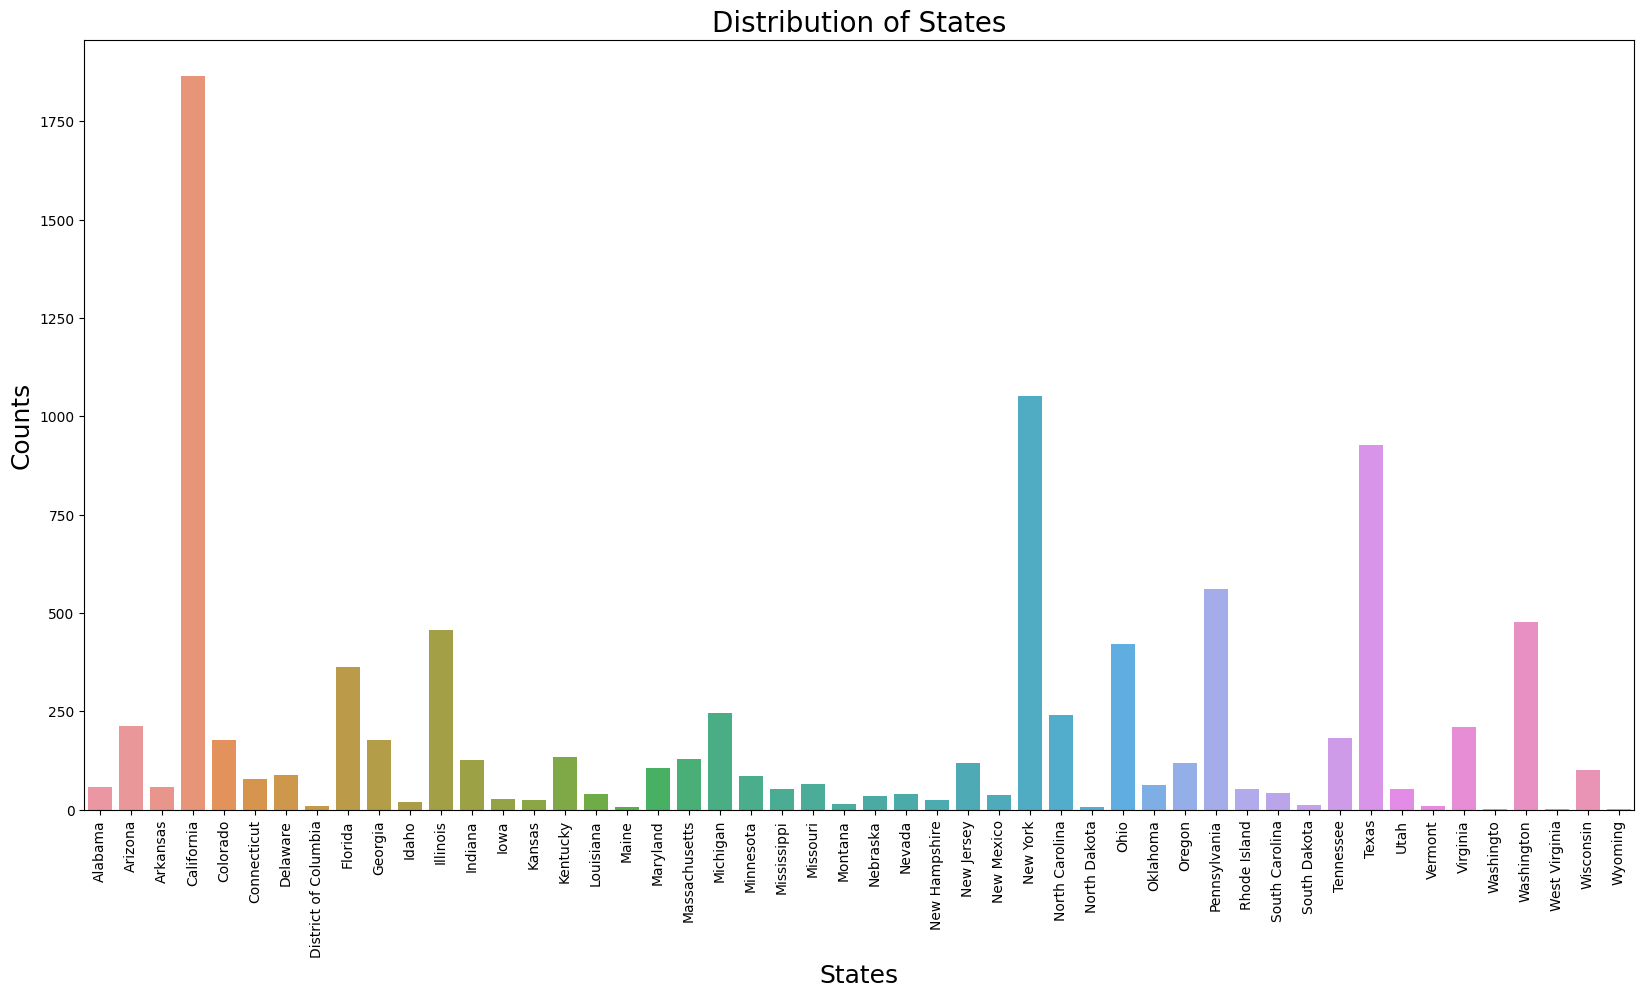

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x=d_frm['State'].sort_values(ascending=True))
plt.xticks(rotation=90)
plt.xlabel('States',fontsize=18)
plt.ylabel('Counts',fontsize=18)
plt.title("Distribution of States",fontsize=20)
plt.show()

####Profit distribution among states

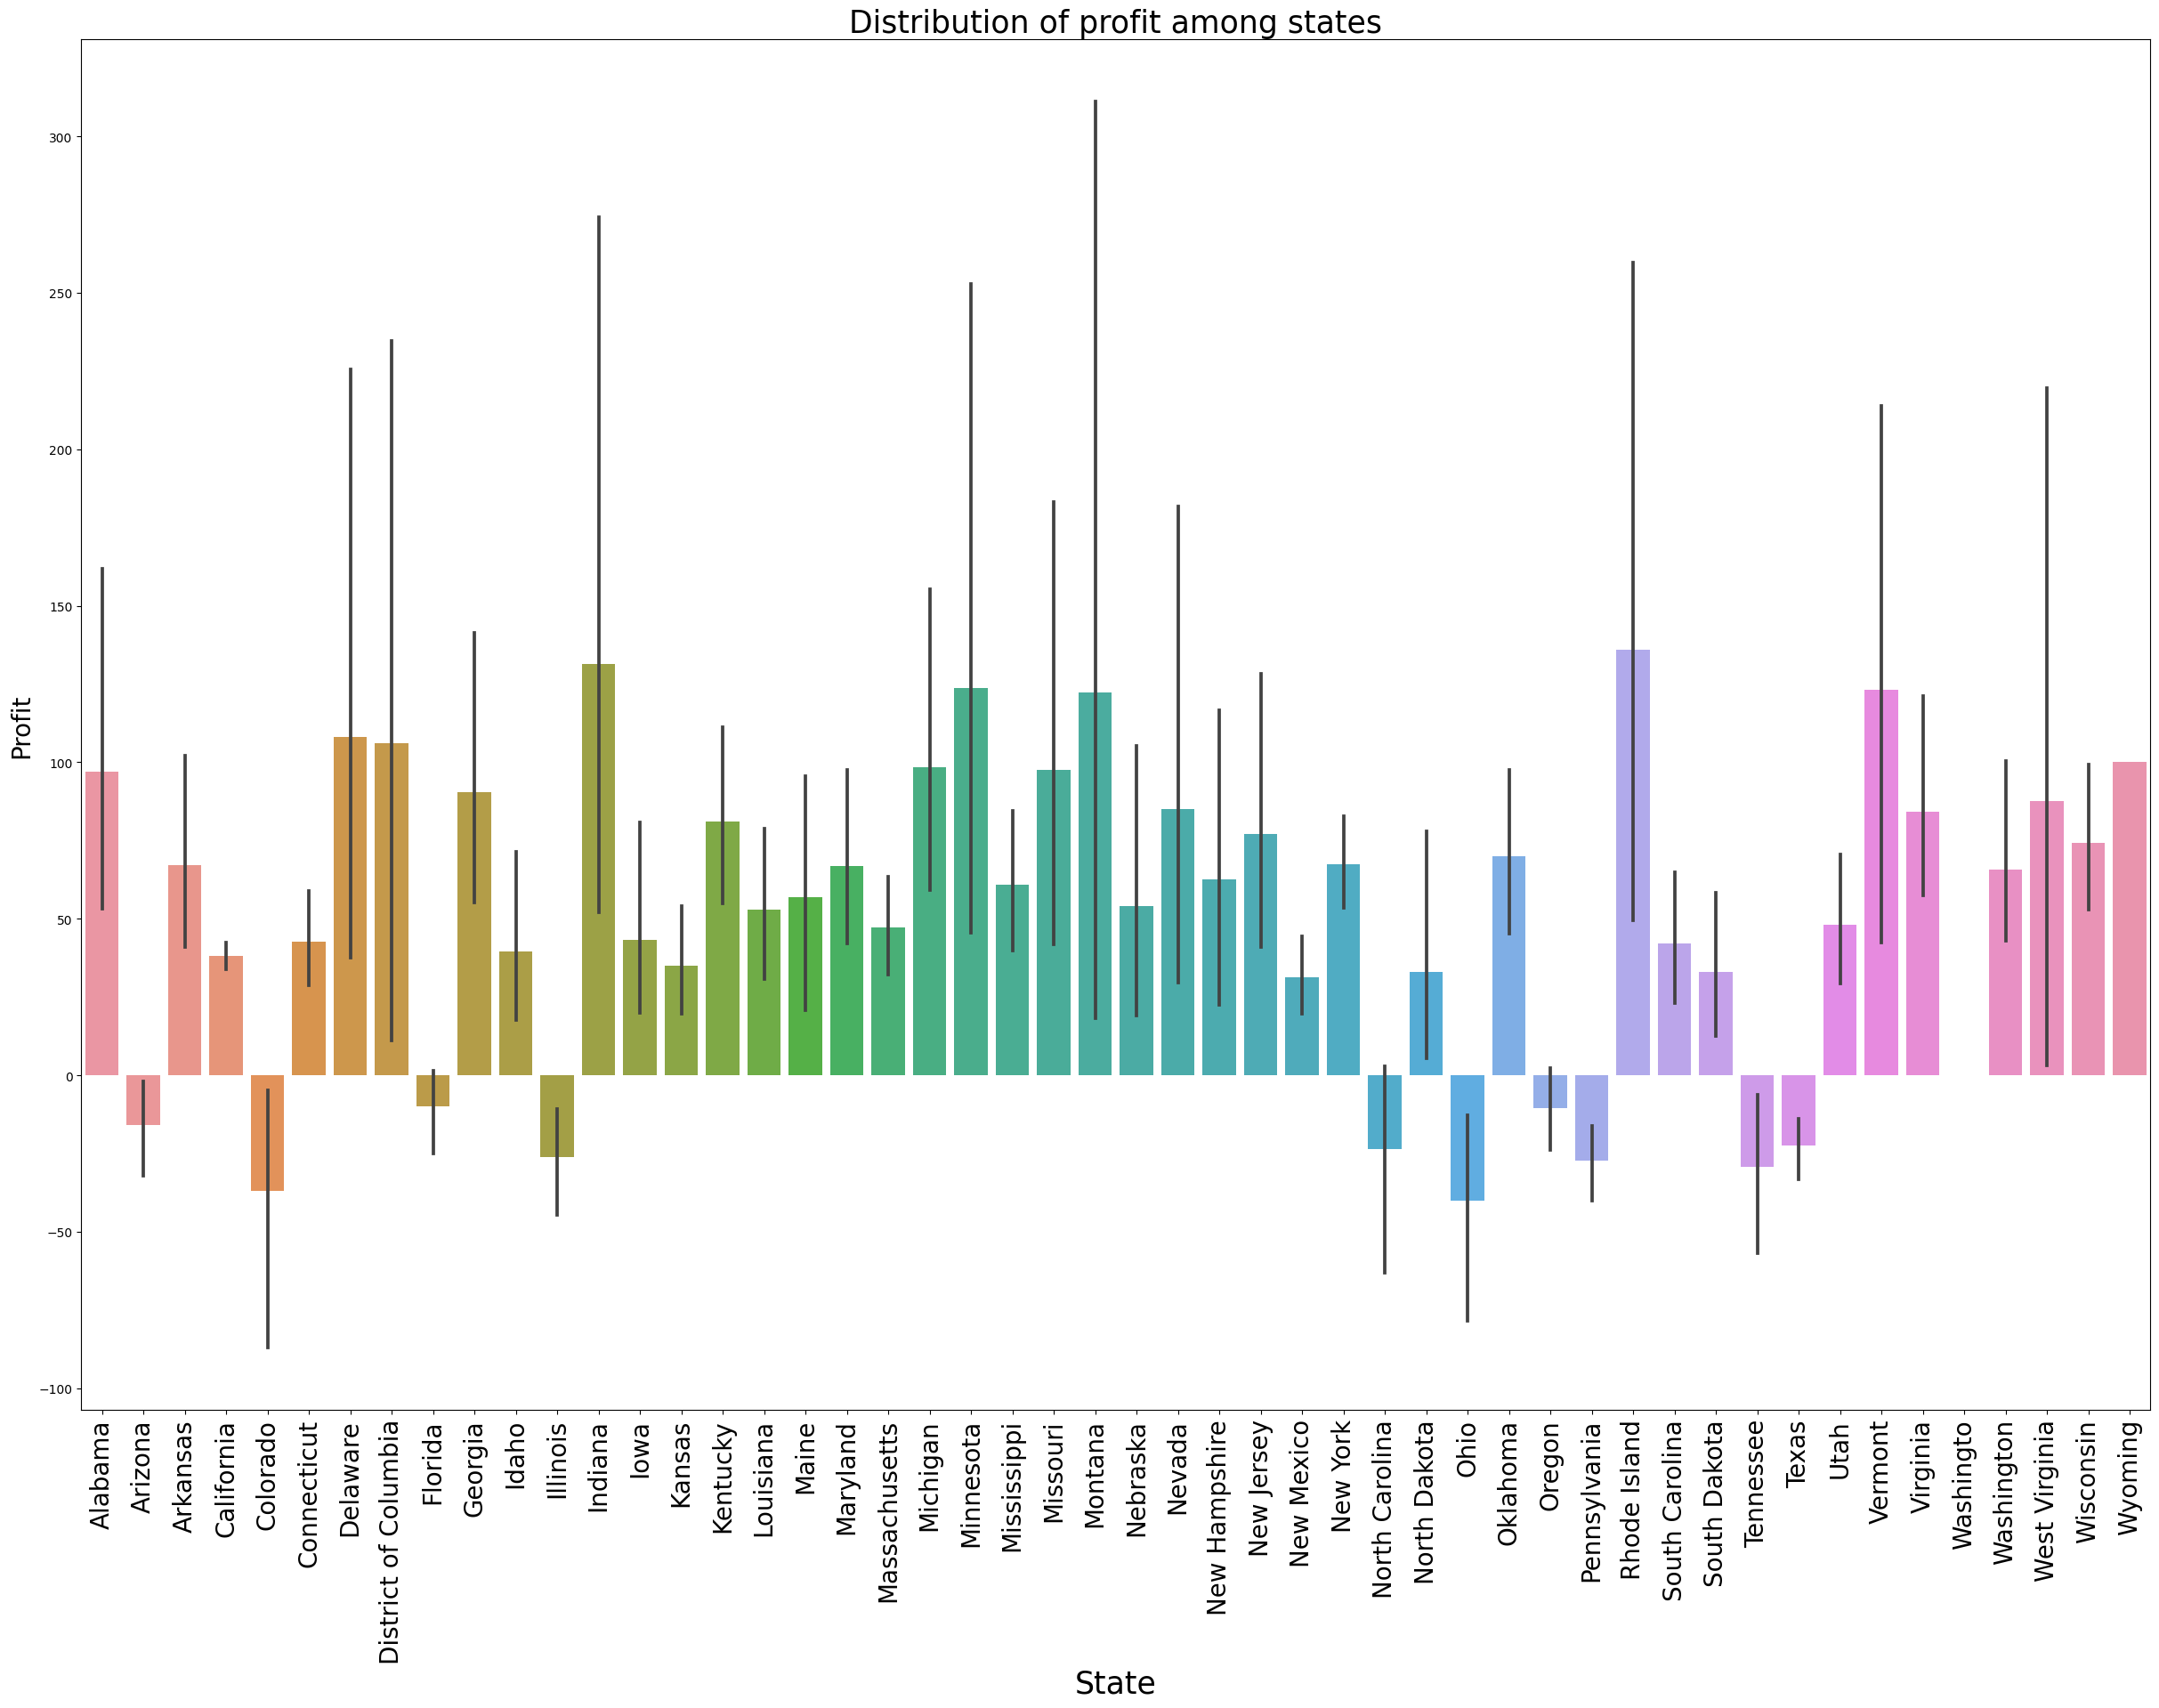

In [ ]:
plt.figure(figsize=(30,20))
sns.barplot(x=d_frm['State'].sort_values(ascending=True),y=d_frm['Profit'])
plt.title('Distribution of profit among states',fontsize=25)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('State',fontsize=25)
plt.ylabel('Profit',fontsize=20)
plt.show()

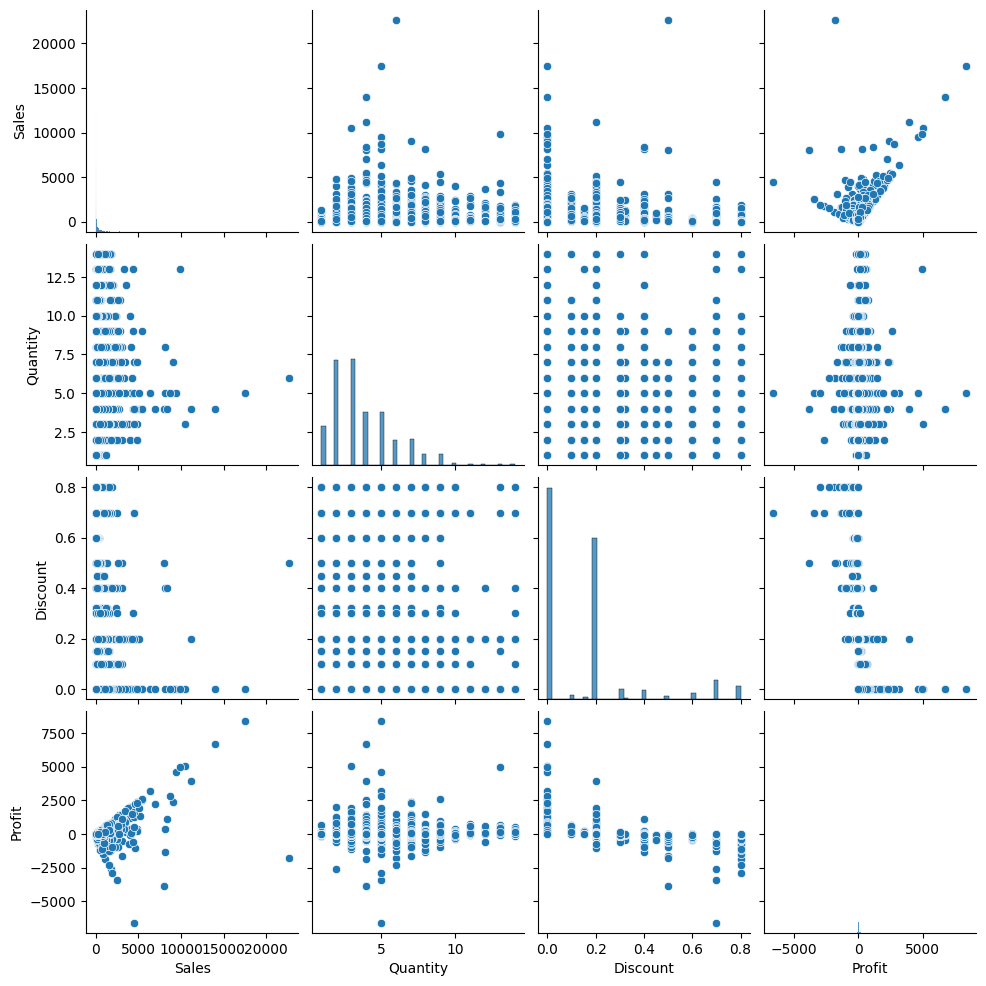

In [ ]:
sns.pairplot(d_frm)

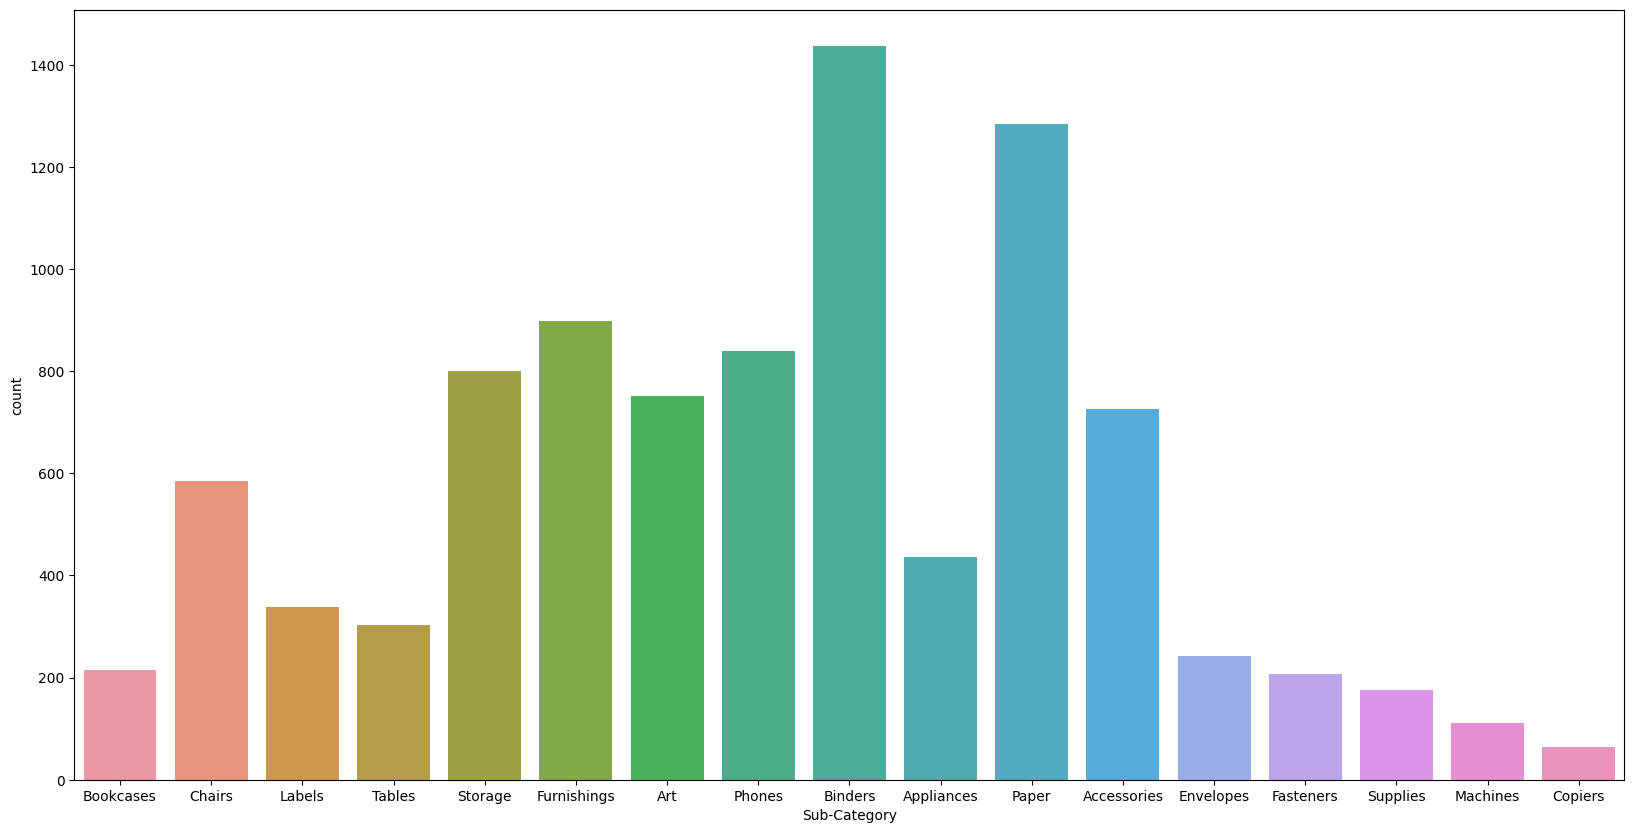

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category",data=d_frm)
plt.show()

From the above barplot, it is very clear that the Copiers and Machines Subcategory need to be improved

#### loss in Sales


In [ ]:
loss_df=d_frm[d_frm['Profit'] < 0]
print("All loss sales: ")
loss_df.head(2)

All loss sales: 


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5.0,0.45,-383.031
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5.0,0.80,-123.858


In [ ]:
# displaying total loss
tot_loss=(loss_df['Profit'].sum())
print(tot_loss)

-145955.9739


In [ ]:
#loss in each segment
seg_loss=loss_df.groupby("Segment").sum().reset_index()
seg_loss

<ipython-input-59-1ee8e35a26a5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seg_loss=loss_df.groupby("Segment").sum().reset_index()


,Segment,Sales,Quantity,Discount,Profit
0,Consumer,229420.7612,3451.0,450.63,-77232.9880
1,Corporate,126363.7761,2084.0,257.96,-43585.6054
2,Home Office,85261.5819,1126.0,142.86,-25137.3805


<Axes: xlabel='Segment'>

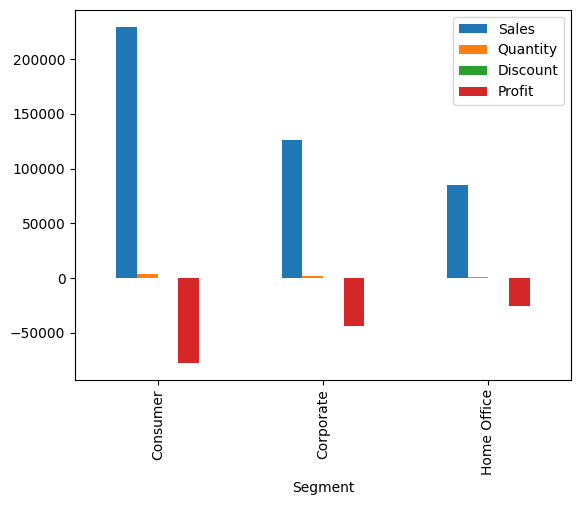

In [ ]:
seg_loss.plot.bar(x='Segment')

In [ ]:
reg_loss=loss_df.groupby("Region").sum().reset_index()

<ipython-input-29-e00d4334b10e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reg_loss=loss_df.groupby("Region").sum().reset_index()


In [ ]:
print(reg_loss)

    Region        Sales  Quantity  Discount      Profit
0  Central  129052.7702    2596.0    379.10 -49924.7602
1     East  152272.9710    1887.0    234.30 -47956.4547
2    South   86657.3850     966.0    123.45 -25579.5840
3     West   73062.9930    1212.0    114.60 -22495.1750


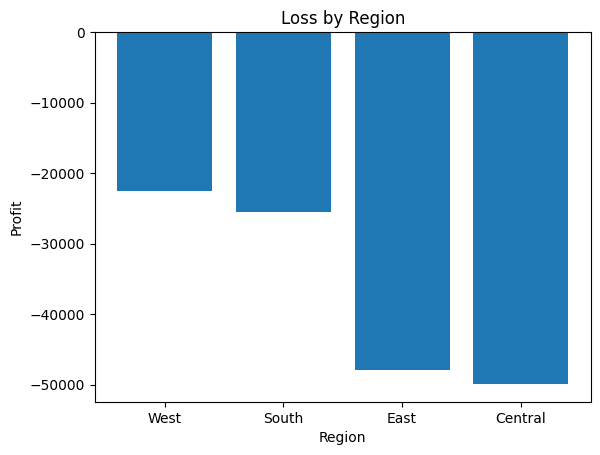

In [ ]:
plt.bar(reg_loss["Region"][::-1],reg_loss["Profit"][::-1])
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Loss by Region')
plt.show()


it is clear that the Central region suffered more losses follwed by East

#### Sales

<Axes: xlabel='Segment'>

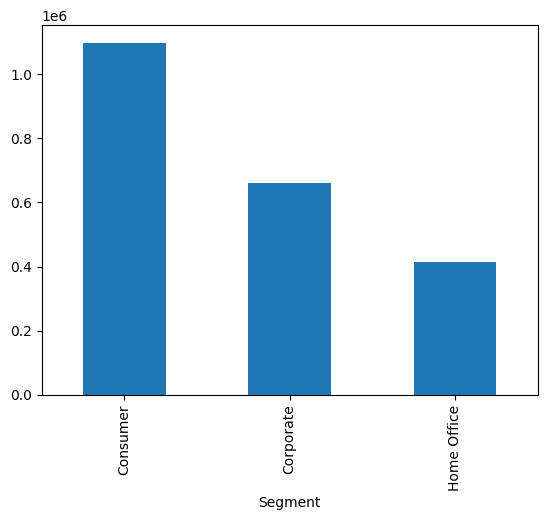

In [ ]:
sales_df=d_frm.groupby("Segment")["Sales"].sum()
sales_df.plot.bar()

#### Distribution based on Region

Text(0.5, 1.0, 'Distribution of Regions')

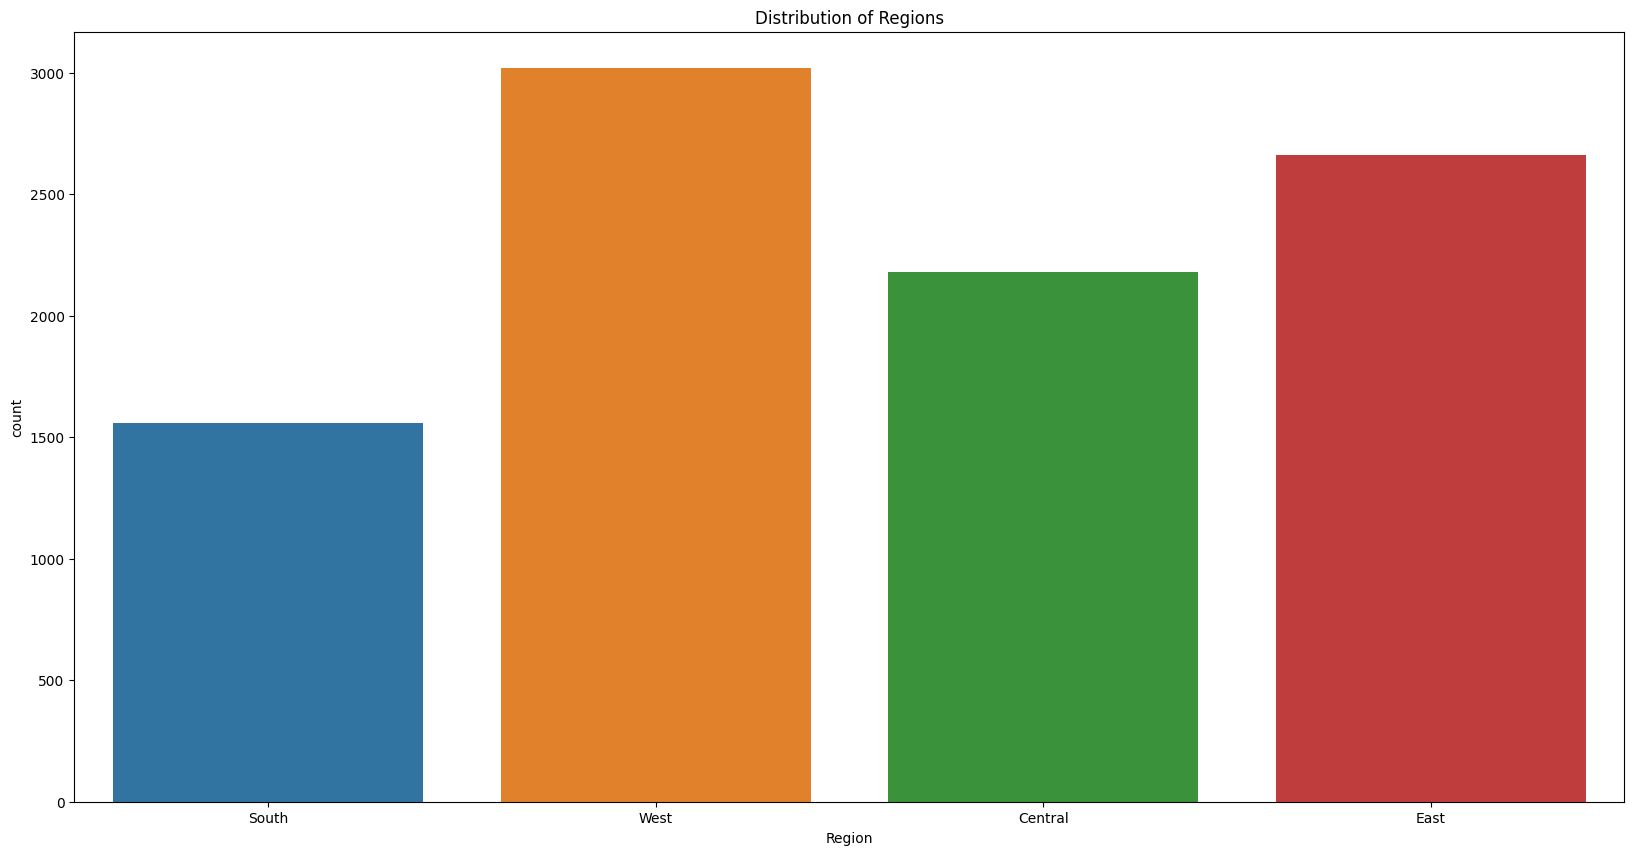

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='Region')
plt.title('Distribution of Regions')

Text(0.5, 1.0, 'Distribution of Categories')

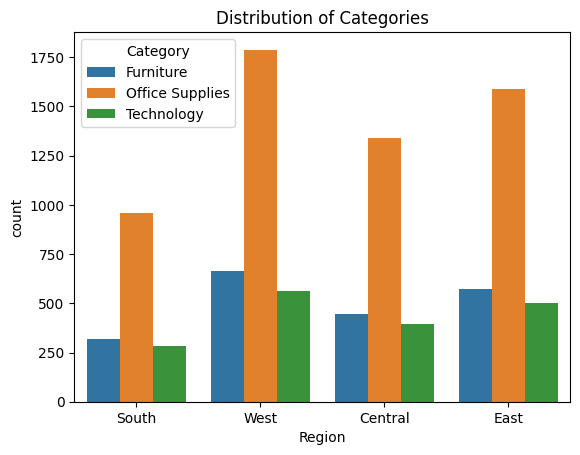

In [ ]:
sns.countplot(data=data,x='Region',hue='Category')
plt.title('Distribution of Categories')

Distribution based on Categories/Sub-Categories

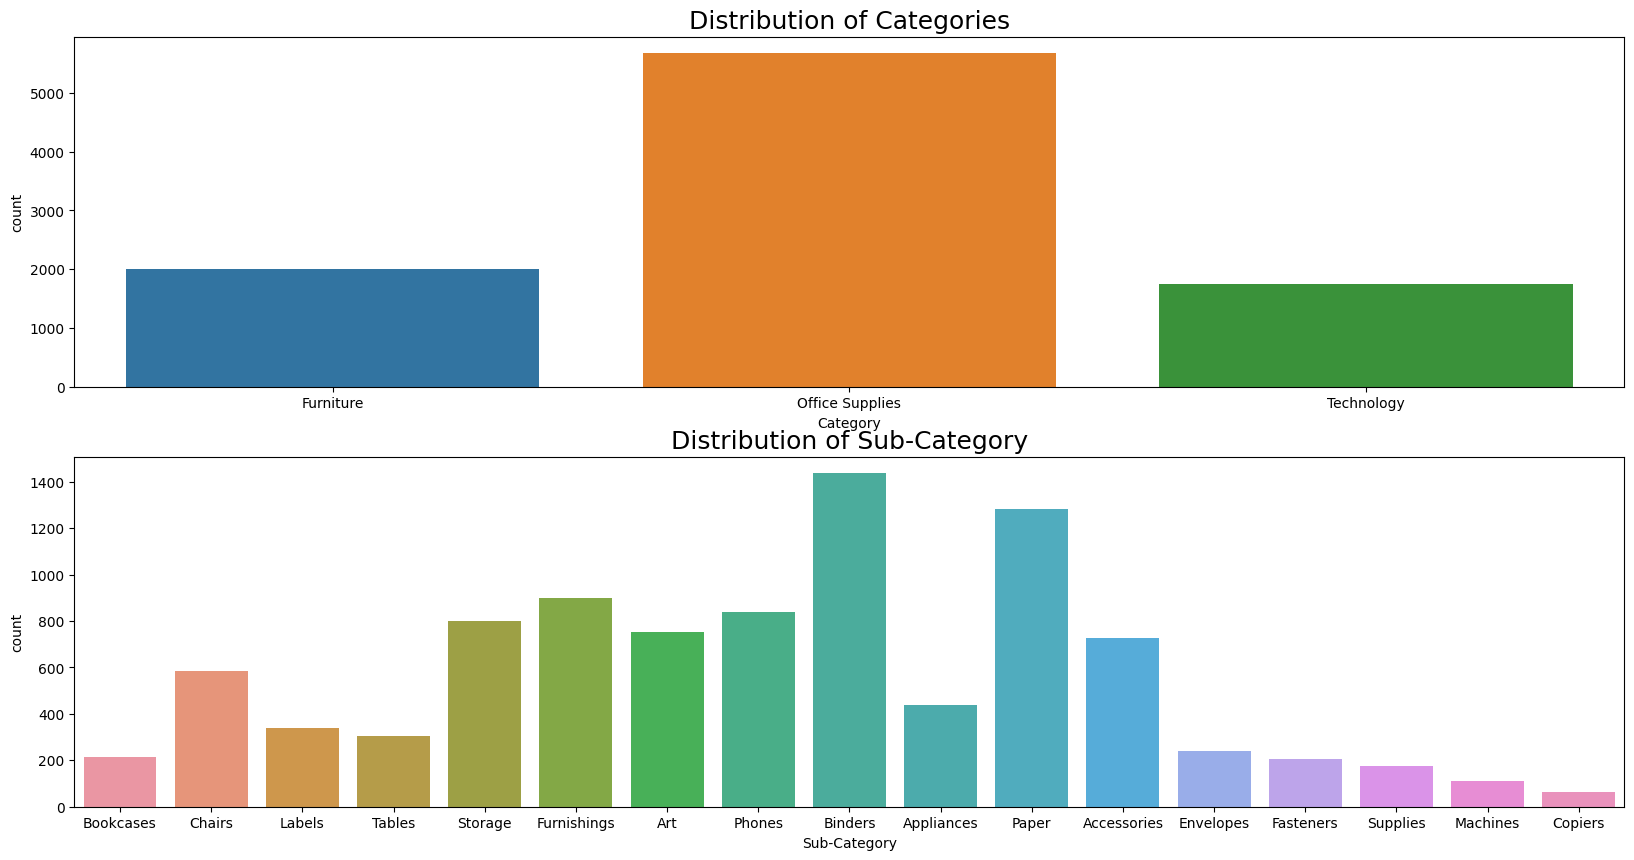

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot(data=d_frm,x='Category')
plt.title('Distribution of Categories',fontsize=18)
plt.subplot(2,1,2)
sns.countplot(data=d_frm,x='Sub-Category')
plt.title('Distribution of Sub-Category',fontsize=18)
plt.show()